<a href="https://colab.research.google.com/github/ankitsharma38/Machine_Learning_LABS/blob/main/Practical_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Practcal 4 :Implement classification techniques evaluation parameters using sample dataset.**

Testing Evaluation Result for Logistic Regression

Accuracy: 0.77
Precision: 0.67
Recall: 0.44
F1 Score: 0.53
ROC AUC Score: 0.81
[[19  2]
 [ 5  4]]


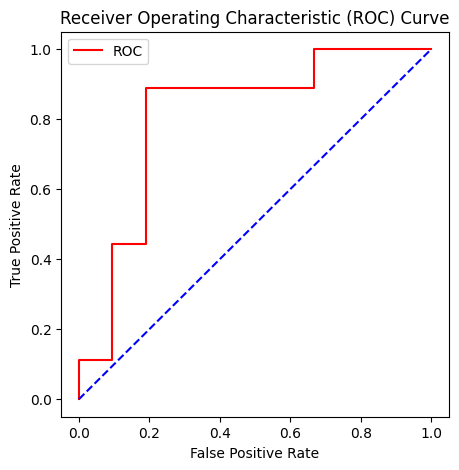

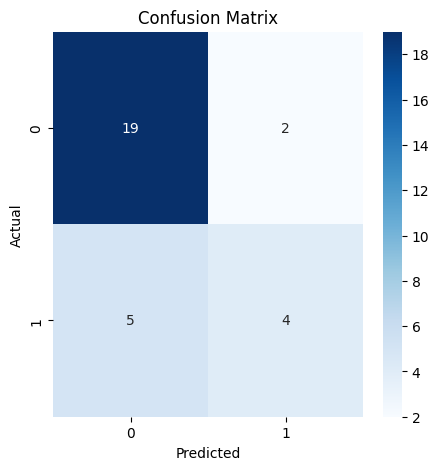

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn import datasets

# Load dataset
iris = datasets.load_iris()

# Select first two features
X = iris.data[:, :2]
y = iris.target

# Convert to binary classification (class 1 vs rest)
y = np.where(y == 1, 1, 0)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

# Print results
print("Testing Evaluation Result for Logistic Regression\n")
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print(f'ROC AUC Score: {roc_auc:.2f}')
cm_rf_test = confusion_matrix(y_test, y_pred)
print(cm_rf_test)

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, color='red', label='ROC')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

plt.figure(figsize=(5,5))
sns.heatmap(cm_rf_test, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()